<a href="https://colab.research.google.com/github/jrichwiltshire/hands-on-data-science/blob/main/ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np

In [8]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

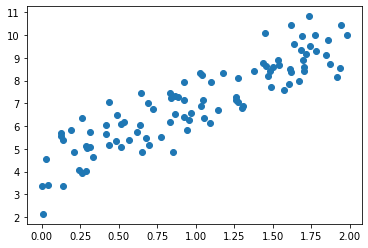

In [10]:
plt.yticks(range(0,15))
plt.scatter(X, y)

In [11]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[4.18625294],
       [2.83365313]])

In [14]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.18625294],
       [9.8535592 ]])

(0.0, 2.0, 0.0, 15.0)

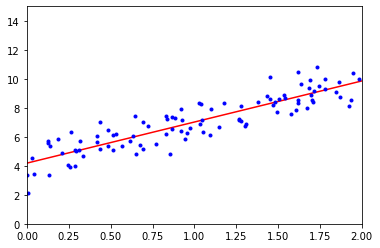

In [15]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.18625294]), array([[2.83365313]]))

In [18]:
lin_reg.predict(X_new)

array([[4.18625294],
       [9.8535592 ]])

In [20]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.18625294],
       [2.83365313]])

In [21]:
np.linalg.pinv(X_b).dot(y)

array([[4.18625294],
       [2.83365313]])

In [22]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [23]:
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [24]:
theta

array([[4.18625294],
       [2.83365313]])